<a href="https://colab.research.google.com/github/Aya11ali/Iris_Flower_Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,  RepeatedStratifiedKFold, learning_curve, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

iris = load_iris()

X = iris.data  # features
y = iris.target  # target labels

In [131]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y


# 1- Data Exploratory

In [132]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dataset Rows & Columns count

In [133]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


### Dataset Information

In [134]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [136]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


### Missing Values/Null Values

In [137]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


### Duplicate Values

In [138]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 1


In [139]:
df.drop_duplicates(inplace=True)

In [140]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### Check Unique Values for each variable.

In [141]:
for i in df.columns.tolist():
  print (f"No. of unique values in {i} is {df[i].nunique()}")

No. of unique values in sepal length (cm) is 35
No. of unique values in sepal width (cm) is 23
No. of unique values in petal length (cm) is 43
No. of unique values in petal width (cm) is 22
No. of unique values in species is 3


## What did i know about the dataset?


*   The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
*   There are 150 rows and 6 columns provided in the data.
*   One duplicate value exist.
*   No Null values exist.

# 2- Data Visualization : Understand the relationships between variables

### Chart - 1 : Distribution of Numerical Variables

Text(0.5, 1.0, 'petal width (cm)')

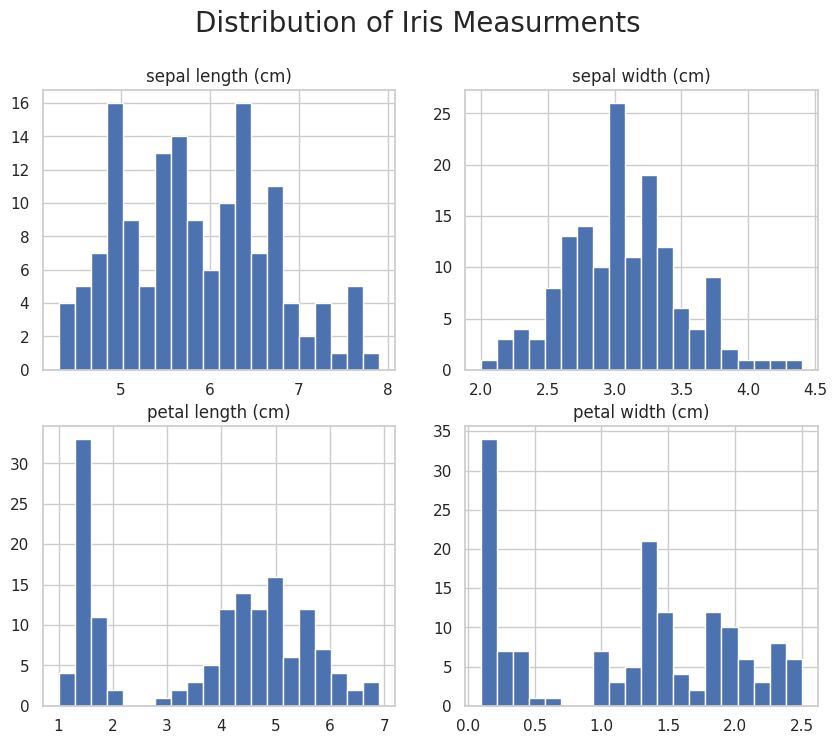

In [142]:
plt.figure(figsize=(10,8))
plt.suptitle('Distribution of Iris Measurments',fontsize=20)

plt.subplot(2,2,1)
plt.hist(df['sepal length (cm)'],bins=20)
plt.title('sepal length (cm)')

plt.subplot(2,2,2)
plt.hist(df['sepal width (cm)'],bins=20)
plt.title('sepal width (cm)')

plt.subplot(2,2,3)
plt.hist(df['petal length (cm)'],bins=20)
plt.title('petal length (cm)')

plt.subplot(2,2,4)
plt.hist(df['petal width (cm)'],bins=20)
plt.title('petal width (cm)')

### Chart-2 : Iris Dataset Feature Relationships by Species

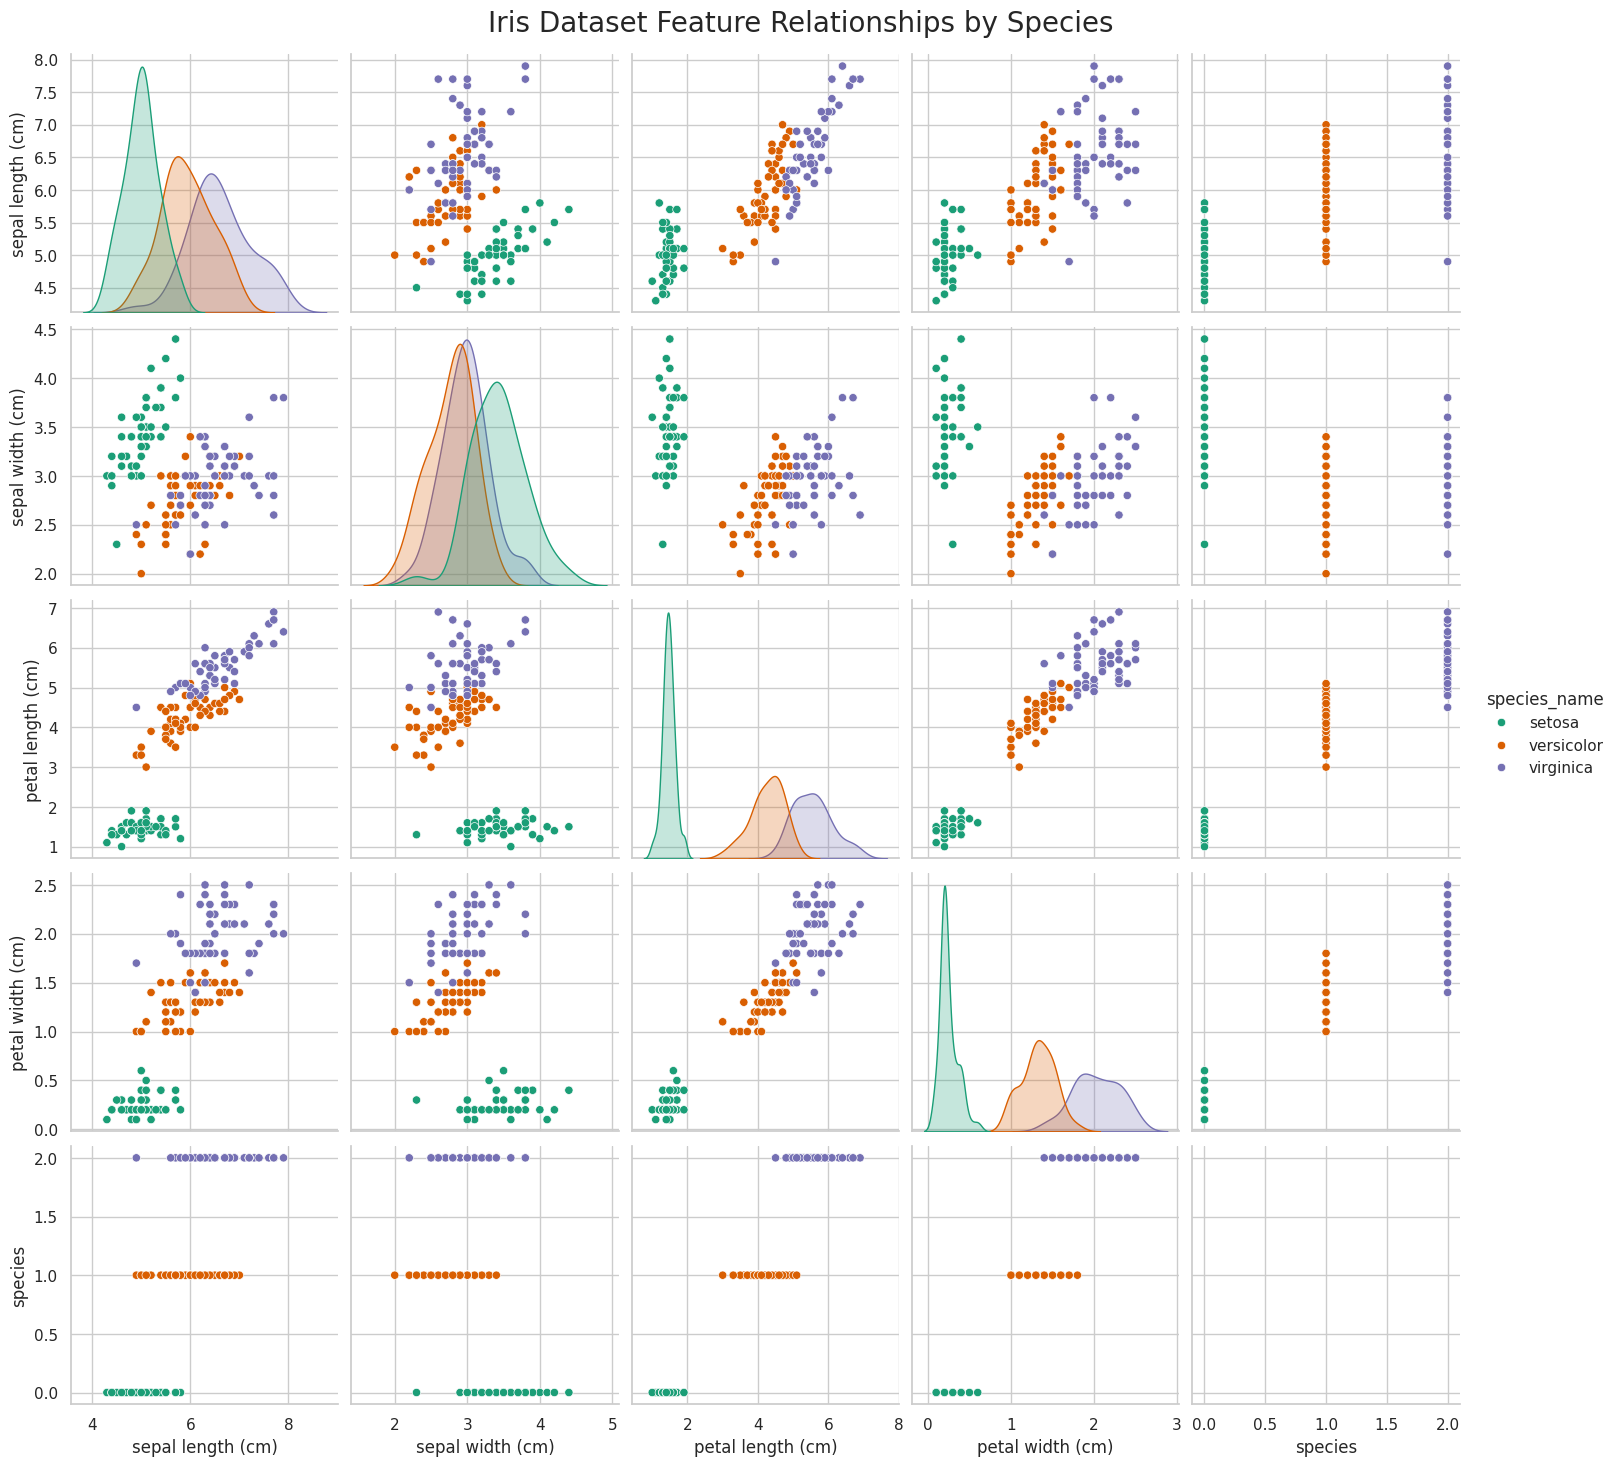

In [143]:
# Map numeric species to names for readability
df['species_name'] = iris.target_names[df['species']]

sns.set(style="whitegrid")
plot =sns.pairplot(
    df,
    hue='species_name',
    palette='Dark2',
    height=3
)

plot.fig.suptitle("Iris Dataset Feature Relationships by Species", fontsize=20)
plot.fig.subplots_adjust(top=0.95)  # Adjust so title doesn’t overlap the plots
plt.show()

In most scatter plots, Setosa (blue) forms a clean cluster far from the orange and green points.

Orange (Versicolor) and green (Virginica) points overlap more in most plots.

But they separate better in:

*   petal length
*   petal width

These two classes may be harder to separate, but petal features help.

Sepal features may not help as much alone — petal features look more informative.


---

1.   Setosa is easily separable
2.   Versicolor and Virginica overlap
3.   Sepal features are less powerful for separatio

### Chart-3 : Iris Dataset (Petal Length vs Petal Width) Relationships by Species

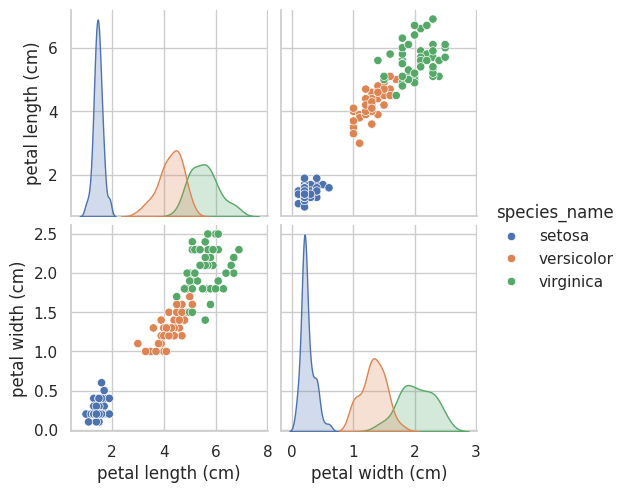

In [144]:
sns.pairplot(df, hue='species_name', vars=['petal length (cm)', 'petal width (cm)'])
plt.show()

### Chart - 4 : Correlation Heatmap

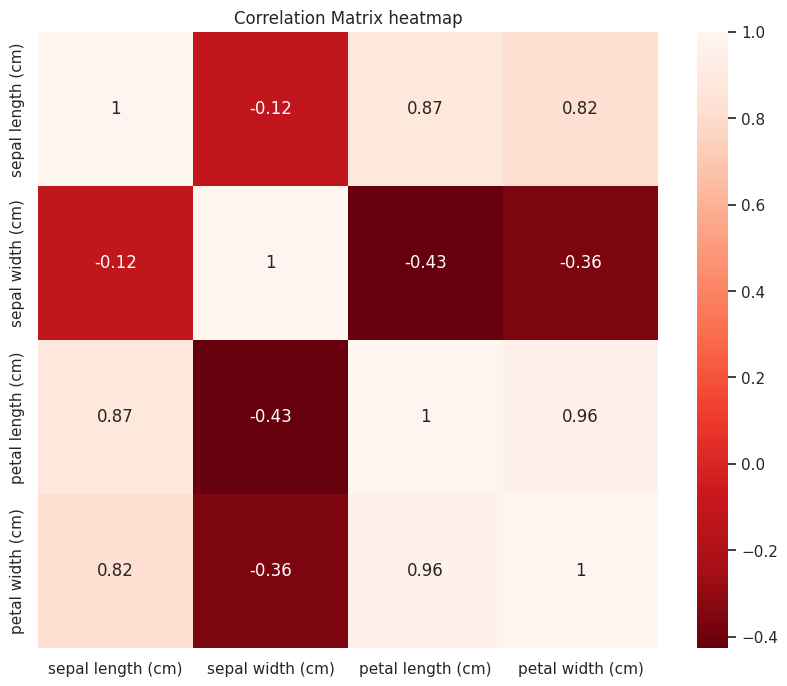

In [145]:
corr_Matrix = df[iris.feature_names].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_Matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix heatmap')
plt.show()

# 3- Feature Engineering & Data Pre-processing

### 1- Data Scaling

In [146]:
x = df.drop(columns=['species', 'species_name'],axis=1)
y = df['species']

### 2- Data Splitting

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
species,
1,41
0,40
2,38


# 4- Model Evaluation

In [149]:
class ModelEvaluation:
  def __init__(self,class_names,model,x_train,x_test,y_train,y_test):
    self.class_names = class_names
    self.model = model
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def train(self):
    self.model.fit(self.x_train,self.y_train)

  def predict(self):
    self.y_pred_train = self.model.predict(self.x_train)
    self.y_pred_test = self.model.predict(self.x_test)

  def evaluate(self):
    self.train()
    self.predict()

  def calculate_confusion_matrix(self):
    if not hasattr(self, 'y_pred_train'):
        raise ValueError("Please run evaluate() before calculating metrics.")

    self.cm_train = confusion_matrix(self.y_train, self.y_pred_train)
    self.cm_test = confusion_matrix(self.y_test, self.y_pred_test)

  def plot_confusion_matrix(self):
    if not (hasattr(self, 'cm_train') and hasattr(self, 'cm_test')):
      raise ValueError("Please run calculate_confusion_matrix() before plotting.")


    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    self._plot_heatmap(self.cm_train, ax[0], "Train Confusion Matrix")
    self._plot_heatmap(self.cm_test, ax[1], "Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

  def _plot_heatmap(self, cm, ax, title):
    sns.heatmap(cm,
                annot=True,
                xticklabels=self.class_names,
                yticklabels=self.class_names,
                cmap="Oranges",
                fmt='.4g',
                ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(title)


  def calculate_classification_report(self):
    if not hasattr(self, 'y_pred_train'):
        raise ValueError("Please run evaluate() before calculating metrics.")

    self.cr_train = classification_report(self.y_train, self.y_pred_train, output_dict=True)
    self.cr_test = classification_report(self.y_test, self.y_pred_test, output_dict=True)
    self.crt_train_df = pd.DataFrame(self.cr_train).T
    self.crt_test_df = pd.DataFrame(self.cr_test).T


  def calculate_metrics(self):
    if not hasattr(self, 'cr_train'):
        raise ValueError("Please run calculate_classification_report() before calculating metrics.")

    self.precision_train = self.cr_train['weighted avg']['precision']
    self.precision_test = self.cr_test['weighted avg']['precision']
    self.recall_train = self.cr_train['weighted avg']['recall']
    self.recall_test = self.cr_test['weighted avg']['recall']
    self.F1_train = self.cr_train['weighted avg']['f1-score']
    self.F1_test = self.cr_test['weighted avg']['f1-score']

  def calculate_accuracy(self):
    if not hasattr(self, 'y_pred_train'):
      raise ValueError("Please run evaluate() before calculating metrics.")

    self.acc_train = accuracy_score(y_true = self.y_train, y_pred = self.y_pred_train)
    self.acc_test = accuracy_score(y_true = self.y_test, y_pred = self.y_pred_test)

  def calculate_roc_auc(self):
    if not hasattr(self, 'y_pred_train'):
        raise ValueError("Please run evaluate() before calculating metrics.")

    if not hasattr(self.model, 'predict_proba'):
        raise ValueError("This model does not support probability estimates (predict_proba).")

    # Binarize the true labels
    y_train_bin = label_binarize(self.y_train, classes=range(len(self.class_names)))
    y_test_bin = label_binarize(self.y_test, classes=range(len(self.class_names)))

    # Get probability estimates
    y_proba_train = self.model.predict_proba(self.x_train)
    y_proba_test = self.model.predict_proba(self.x_test)

    # Calculate ROC AUC
    self.roc_auc_train = roc_auc_score(y_train_bin, y_proba_train, average='macro', multi_class='ovr')
    self.roc_auc_test = roc_auc_score(y_test_bin, y_proba_test, average='macro', multi_class='ovr')

  def calculate_model_score(self):
    self.calculate_classification_report()
    self.calculate_metrics()
    self.calculate_accuracy()
    self.calculate_roc_auc()

    self.model_score =[self.precision_train, self.precision_test, self.recall_train, self.recall_test, self.acc_train, self.acc_test, self.F1_train, self.F1_test, self.roc_auc_train, self.roc_auc_test]

# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test', 'ROC_AUC Train', 'ROC_AUC Test'])

### Plot Learning Curve

In [150]:
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_macro',
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=0
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Train F1 Macro')
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation F1 Macro')
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("F1 Macro Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# ML Model - 1 : Logistic regression

In [151]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

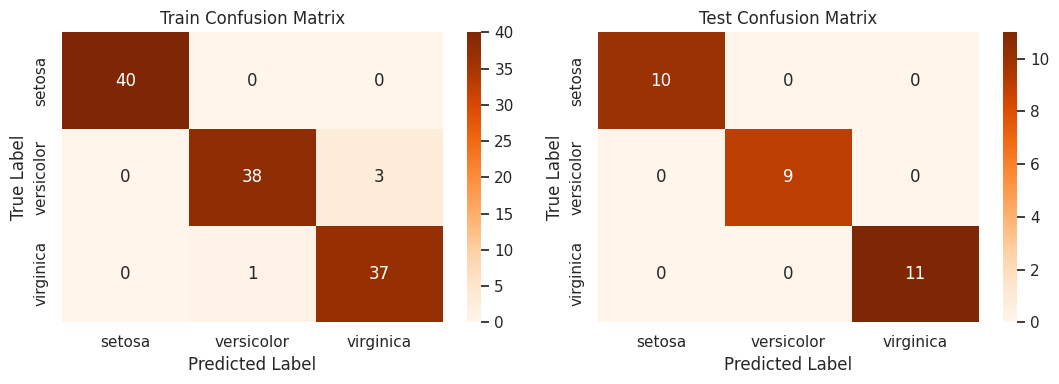

In [152]:
model_1 = ModelEvaluation(class_names=iris.target_names, model=lr_model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_1.evaluate()                     # Fit + predict
model_1.calculate_confusion_matrix()   # Generate matrices
model_1.plot_confusion_matrix()        # Plot them
model_1.calculate_model_score()        # Generate metrics + reports


In [153]:
score['Logistic regression'] = model_1.model_score
score

,Logistic regression
Precision Train,0.967216
Precision Test,1.000000
Recall Train,0.966387
Recall Test,1.000000
Accuracy Train,0.966387
Accuracy Test,1.000000
F1 macro Train,0.966397
F1 macro Test,1.000000
ROC_AUC Train,0.998300
ROC_AUC Test,1.000000


### Cross- Validation & Hyperparameter Tuning

In [154]:

#To avoid Incompatible parameter combinations
C_values = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

param_grid = [
    {'C': C_values, 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': C_values, 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}
]


logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

grid = GridSearchCV(logreg, param_grid, cv=rskf, scoring='f1_macro')
grid.fit(x_train, y_train)

best_params = grid.best_params_
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [155]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)

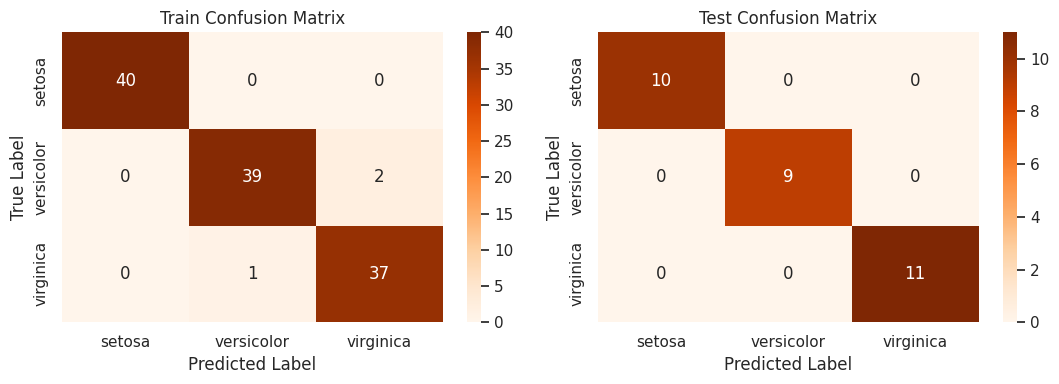

In [156]:
model_ = ModelEvaluation(class_names=iris.target_names, model=lr_model2, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()                     # Fit + predict
model_.calculate_confusion_matrix()   # Generate matrices
model_.plot_confusion_matrix()        # Plot them
model_.calculate_model_score()        # Generate metrics + reports


In [157]:
score['Logistic regression tuned'] = model_.model_score
score

,Logistic regression,Logistic regression tuned
Precision Train,0.967216,0.975011
Precision Test,1.000000,1.000000
Recall Train,0.966387,0.974790
Recall Test,1.000000,1.000000
Accuracy Train,0.966387,0.974790
Accuracy Test,1.000000,1.000000
F1 macro Train,0.966397,0.974798
F1 macro Test,1.000000,1.000000
ROC_AUC Train,0.998300,0.998937
ROC_AUC Test,1.000000,1.000000


# ML Model - 2 : Decision Tree

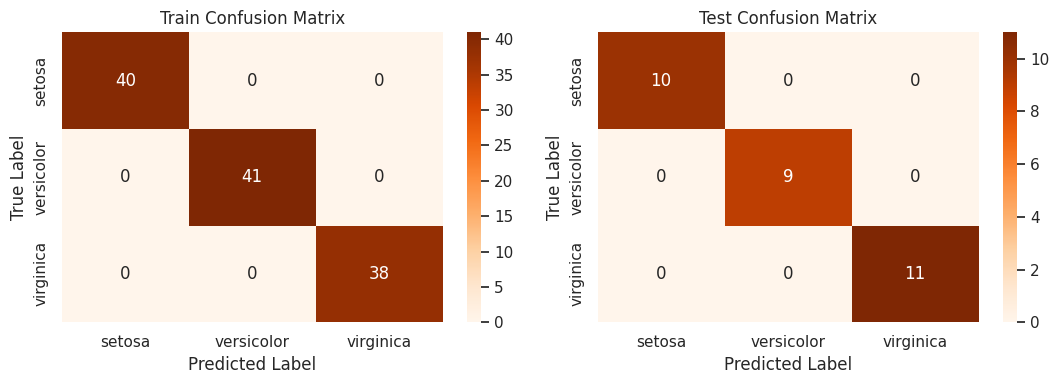

In [158]:
dt_model = DecisionTreeClassifier(random_state=20)

model_ = ModelEvaluation(class_names=iris.target_names, model=dt_model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()                     # Fit + predict
model_.calculate_confusion_matrix()   # Generate matrices
model_.plot_confusion_matrix()        # Plot them
model_.calculate_model_score()        # Generate metrics + reports

In [159]:
score['Decision Tree'] = model_.model_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.967216,0.975011,1.0
Precision Test,1.000000,1.000000,1.0
Recall Train,0.966387,0.974790,1.0
Recall Test,1.000000,1.000000,1.0
Accuracy Train,0.966387,0.974790,1.0
Accuracy Test,1.000000,1.000000,1.0
F1 macro Train,0.966397,0.974798,1.0
F1 macro Test,1.000000,1.000000,1.0
ROC_AUC Train,0.998300,0.998937,1.0
ROC_AUC Test,1.000000,1.000000,1.0


### Cross- Validation & Hyperparameter Tuning

In [160]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

grid_search = GridSearchCV(model, grid, cv=rskf, scoring='f1_macro')

grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(10), 'min_samples_split': np.int64(2)}


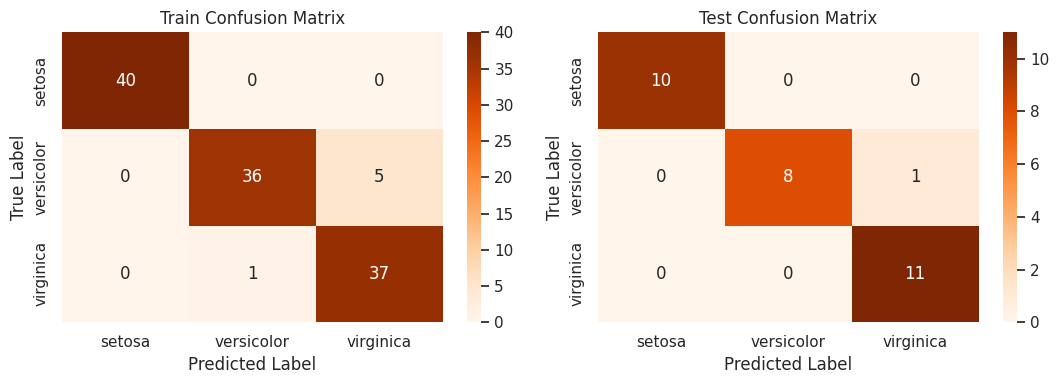

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.967216,0.975011,1.0,0.952673
Precision Test,1.000000,1.000000,1.0,0.969444
Recall Train,0.966387,0.974790,1.0,0.949580
Recall Test,1.000000,1.000000,1.0,0.966667
Accuracy Train,0.966387,0.974790,1.0,0.949580
Accuracy Test,1.000000,1.000000,1.0,0.966667
F1 macro Train,0.966397,0.974798,1.0,0.949548
F1 macro Test,1.000000,1.000000,1.0,0.966411
ROC_AUC Train,0.998300,0.998937,1.0,0.992562
ROC_AUC Test,1.000000,1.000000,1.0,0.993283


In [161]:
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)

model_ = ModelEvaluation(class_names=iris.target_names, model=dt_model2, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()                     # Fit + predict
model_.calculate_confusion_matrix()   # Generate matrices
model_.plot_confusion_matrix()        # Plot them
model_.calculate_model_score()        # Generate metrics + reports

score['Decision Tree tuned'] = model_.model_score
score

### Check OverFitting

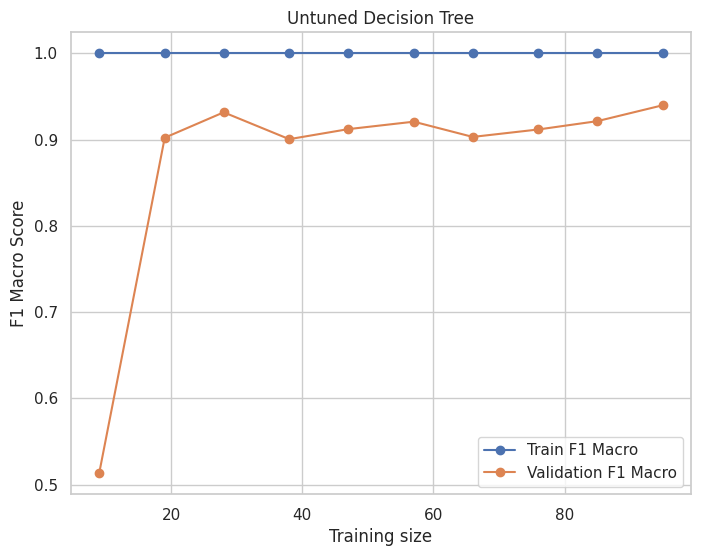

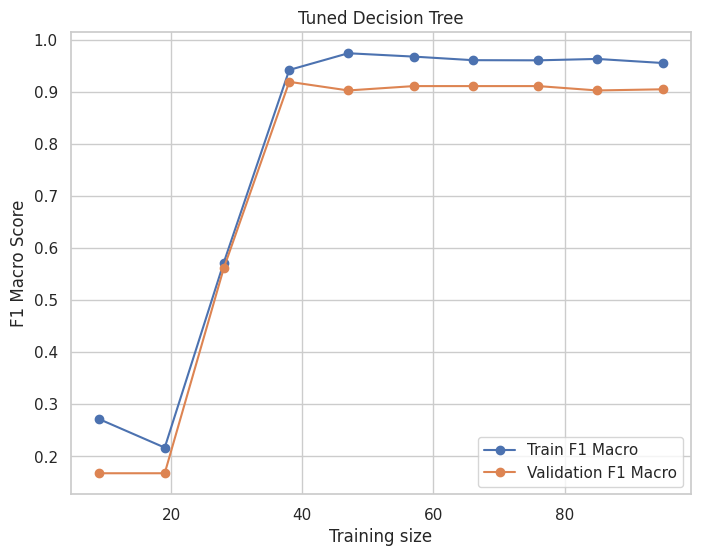

In [162]:
# Untuned decision tree
plot_learning_curve(DecisionTreeClassifier(random_state=0), x_train, y_train, title="Untuned Decision Tree")

# Tuned decision tree
plot_learning_curve(DecisionTreeClassifier(**best_params, random_state=0), x_train, y_train, title="Tuned Decision Tree")

The tuned model is not overfitting like the untuned model.

In [163]:
from sklearn.model_selection import cross_val_score

# Outer loop for unbiased performance estimate
outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)

# Inner loop: our GridSearch
inner_cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=0)

grid_search_nested = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=grid, cv=inner_cv, scoring='f1_macro')

# Nested cross-val
nested_scores = cross_val_score(grid_search_nested, x_train, y_train, cv=outer_cv, scoring='f1_macro')

print(f"Nested CV F1 macro mean: {nested_scores.mean():.4f}, std: {nested_scores.std():.4f}")


Nested CV F1 macro mean: 0.9232, std: 0.0257


The decision tree classifier was evaluated in two forms: untuned (default hyperparameters) and tuned (with hyperparameter optimization). The untuned model appeared to achieve perfect performance on both train and test sets:

F1 macro (Train/Test): 1.0

ROC AUC (Train/Test): 1.0

However, this is a strong indication of overfitting, where the model memorized the training data and does not generalize well.

In contrast,  tuned decision tree (with controlled max_depth, min_samples_split, min_samples_leaf) produced:

F1 macro Test: 0.966

ROC AUC Test: 0.993

Slightly lower train scores (F1 macro Train: 0.949)

These results suggest that the tuning reduced overfitting by adding regularization, trading a small amount of performance on the specific test split for better generalization.

✅ Nested cross-validation further confirmed this:

Nested CV F1 macro mean: 0.923

Nested CV F1 macro std: 0.026

This means the tuned model achieves strong, stable generalization performance across different data splits


# ML Model - 3 : Random Forest

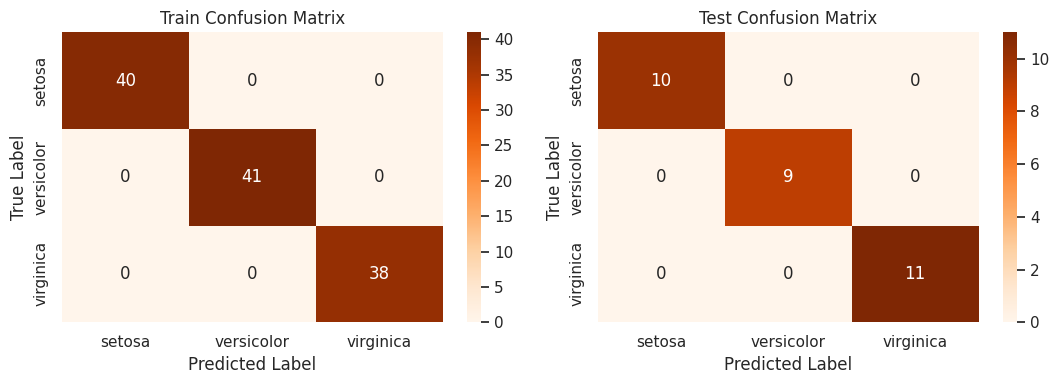

In [164]:
rf_model = RandomForestClassifier(random_state=0)

model_ = ModelEvaluation(class_names=iris.target_names, model=rf_model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()
model_.calculate_confusion_matrix()
model_.plot_confusion_matrix()
model_.calculate_model_score()

In [165]:
score['Random Forest'] = model_.model_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.967216,0.975011,1.0,0.952673,1.0
Precision Test,1.000000,1.000000,1.0,0.969444,1.0
Recall Train,0.966387,0.974790,1.0,0.949580,1.0
Recall Test,1.000000,1.000000,1.0,0.966667,1.0
Accuracy Train,0.966387,0.974790,1.0,0.949580,1.0
Accuracy Test,1.000000,1.000000,1.0,0.966667,1.0
F1 macro Train,0.966397,0.974798,1.0,0.949548,1.0
F1 macro Test,1.000000,1.000000,1.0,0.966411,1.0
ROC_AUC Train,0.998300,0.998937,1.0,0.992562,1.0
ROC_AUC Test,1.000000,1.000000,1.0,0.993283,1.0


### Cross- Validation & Hyperparameter Tuning

In [166]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}

rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=20, n_jobs=-1)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}


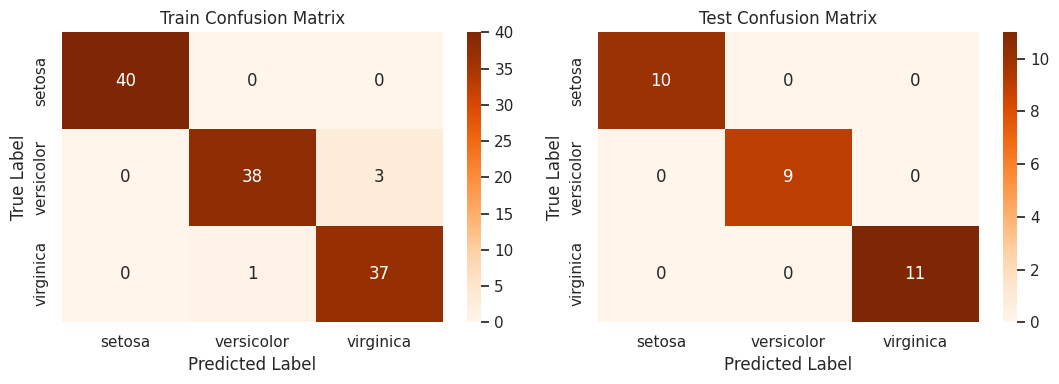

In [167]:
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 min_samples_split = best_params['min_samples_split'],
                                 max_features = best_params['max_features'],
                                 random_state=0)

model_ = ModelEvaluation(class_names=iris.target_names, model=rf_model2, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()
model_.calculate_confusion_matrix()
model_.plot_confusion_matrix()
model_.calculate_model_score()

In [168]:
score['Random Forest tuned'] = model_.model_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.967216,0.975011,1.0,0.952673,1.0,0.967216
Precision Test,1.000000,1.000000,1.0,0.969444,1.0,1.000000
Recall Train,0.966387,0.974790,1.0,0.949580,1.0,0.966387
Recall Test,1.000000,1.000000,1.0,0.966667,1.0,1.000000
Accuracy Train,0.966387,0.974790,1.0,0.949580,1.0,0.966387
Accuracy Test,1.000000,1.000000,1.0,0.966667,1.0,1.000000
F1 macro Train,0.966397,0.974798,1.0,0.949548,1.0,0.966397
F1 macro Test,1.000000,1.000000,1.0,0.966411,1.0,1.000000
ROC_AUC Train,0.998300,0.998937,1.0,0.992562,1.0,0.997662
ROC_AUC Test,1.000000,1.000000,1.0,0.993283,1.0,1.000000


### Check OverFitting - Learning Curve

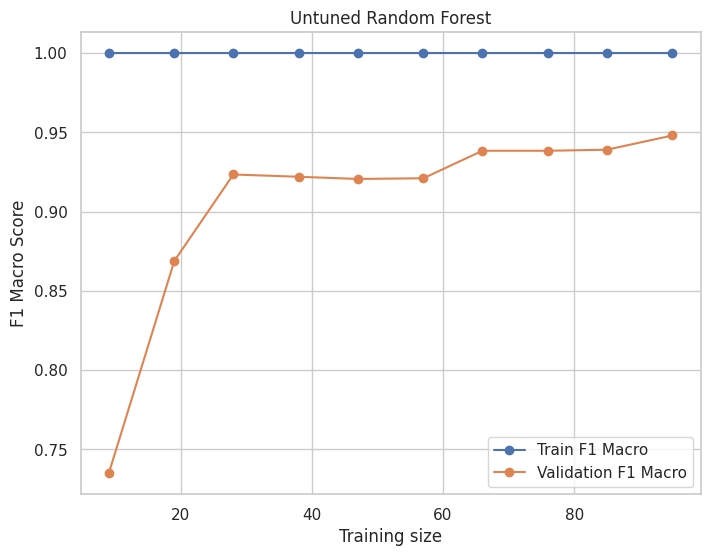

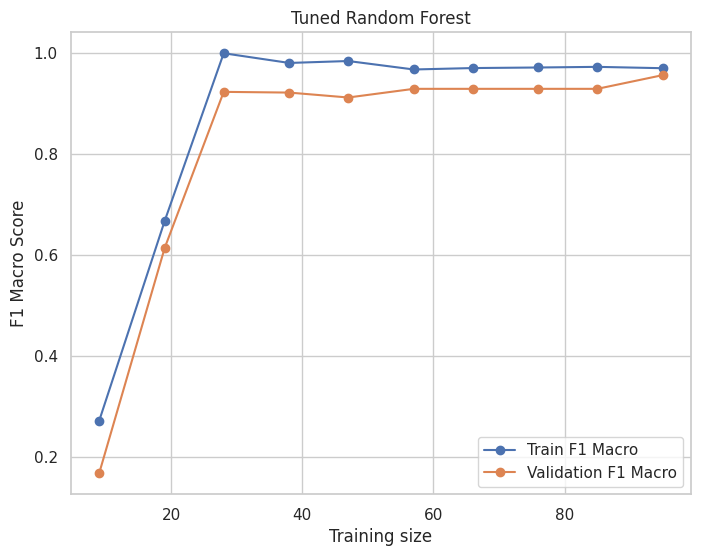

In [169]:
# Untuned decision tree
plot_learning_curve(RandomForestClassifier(random_state=0), x_train, y_train, title="Untuned Random Forest")

# Tuned decision tree
plot_learning_curve(RandomForestClassifier(**best_params, random_state=0), x_train, y_train, title="Tuned Random Forest")

# ML Model - 4 : SVM (Support Vector Machine)

In [170]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)

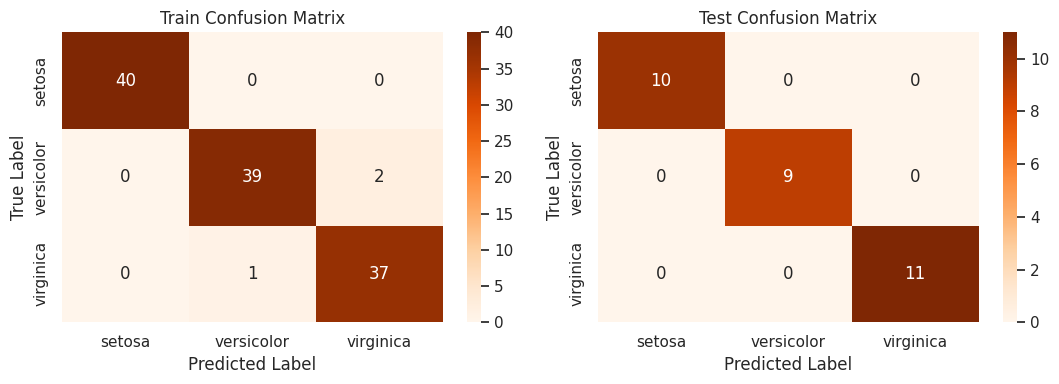

In [171]:
model_ = ModelEvaluation(class_names=iris.target_names, model=svm_model, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()
model_.calculate_confusion_matrix()
model_.plot_confusion_matrix()
model_.calculate_model_score()

In [172]:
score['SVM'] =  model_.model_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.967216,0.975011,1.0,0.952673,1.0,0.967216,0.975011
Precision Test,1.000000,1.000000,1.0,0.969444,1.0,1.000000,1.000000
Recall Train,0.966387,0.974790,1.0,0.949580,1.0,0.966387,0.974790
Recall Test,1.000000,1.000000,1.0,0.966667,1.0,1.000000,1.000000
Accuracy Train,0.966387,0.974790,1.0,0.949580,1.0,0.966387,0.974790
Accuracy Test,1.000000,1.000000,1.0,0.966667,1.0,1.000000,1.000000
F1 macro Train,0.966397,0.974798,1.0,0.949548,1.0,0.966397,0.974798
F1 macro Test,1.000000,1.000000,1.0,0.966411,1.0,1.000000,1.000000
ROC_AUC Train,0.998300,0.998937,1.0,0.992562,1.0,0.997662,0.998937
ROC_AUC Test,1.000000,1.000000,1.0,0.993283,1.0,1.000000,1.000000


In [173]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=20, cv=rskf, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': np.int64(2), 'C': np.float64(4.5)}


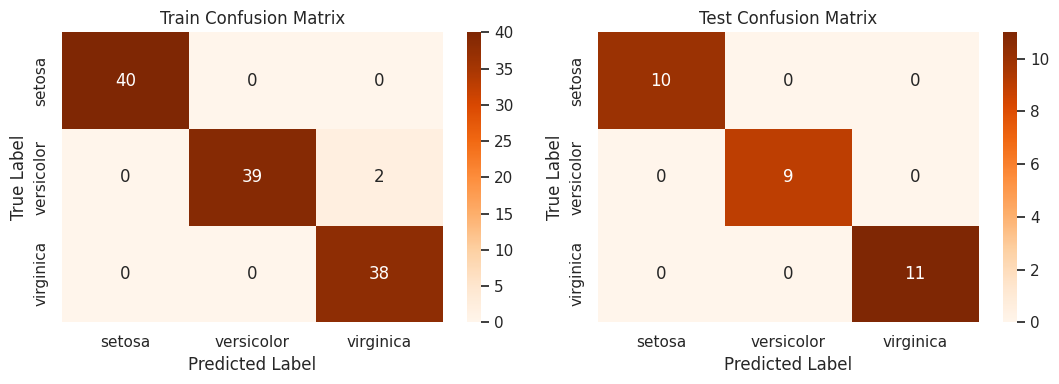

In [174]:
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)

model_ = ModelEvaluation(class_names=iris.target_names, model=svm_model2, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_.evaluate()
model_.calculate_confusion_matrix()
model_.plot_confusion_matrix()
model_.calculate_model_score()

In [175]:
score['SVM tuned'] =  model_.model_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.967216,0.975011,1.0,0.952673,1.0,0.967216,0.975011,0.984034
Precision Test,1.000000,1.000000,1.0,0.969444,1.0,1.000000,1.000000,1.000000
Recall Train,0.966387,0.974790,1.0,0.949580,1.0,0.966387,0.974790,0.983193
Recall Test,1.000000,1.000000,1.0,0.966667,1.0,1.000000,1.000000,1.000000
Accuracy Train,0.966387,0.974790,1.0,0.949580,1.0,0.966387,0.974790,0.983193
Accuracy Test,1.000000,1.000000,1.0,0.966667,1.0,1.000000,1.000000,1.000000
F1 macro Train,0.966397,0.974798,1.0,0.949548,1.0,0.966397,0.974798,0.983199
F1 macro Test,1.000000,1.000000,1.0,0.966411,1.0,1.000000,1.000000,1.000000
ROC_AUC Train,0.998300,0.998937,1.0,0.992562,1.0,0.997662,0.998937,0.999362
ROC_AUC Test,1.000000,1.000000,1.0,0.993283,1.0,1.000000,1.000000,1.000000


### Check OverFitting - Learning Curve

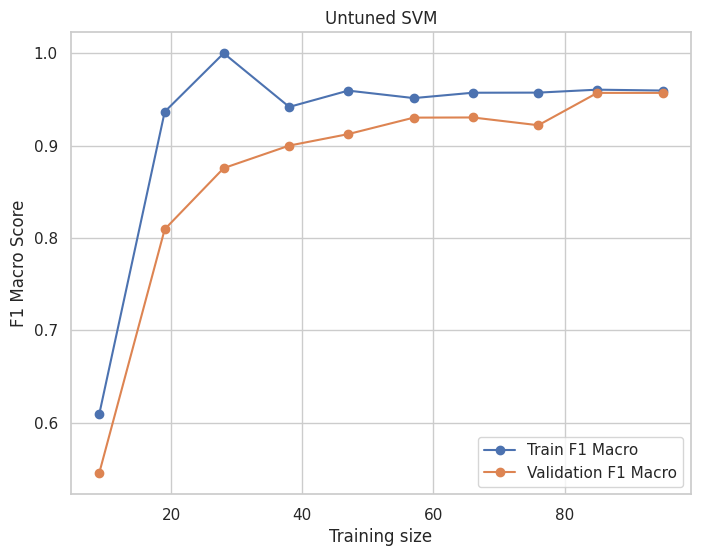

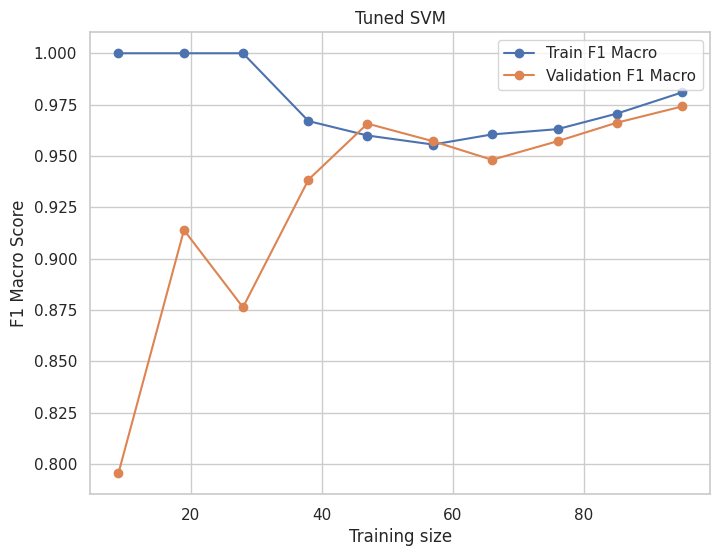

In [176]:
# Untuned decision tree
plot_learning_curve(SVC(random_state=0), x_train, y_train, title="Untuned SVM")

# Tuned decision tree
plot_learning_curve(SVC(**best_params, random_state=0), x_train, y_train, title="Tuned SVM")

# Model Selection

In [177]:

# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index
remove_models

adj = score_t.drop(remove_models)
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test,ROC_AUC Train,ROC_AUC Test
Logistic regression,0.967216,1.000000,0.966387,1.000000,0.966387,1.000000,0.966397,1.000000,0.998300,1.000000
Logistic regression tuned,0.975011,1.000000,0.974790,1.000000,0.974790,1.000000,0.974798,1.000000,0.998937,1.000000
Decision Tree tuned,0.952673,0.969444,0.949580,0.966667,0.949580,0.966667,0.949548,0.966411,0.992562,0.993283
Random Forest tuned,0.967216,1.000000,0.966387,1.000000,0.966387,1.000000,0.966397,1.000000,0.997662,1.000000
SVM,0.975011,1.000000,0.974790,1.000000,0.974790,1.000000,0.974798,1.000000,0.998937,1.000000


In [179]:
adj.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test','ROC_AUC Train','ROC_AUC Test'], axis = 1)

,Recall Train,Recall Test
Logistic regression,0.966387,1.000000
Logistic regression tuned,0.974790,1.000000
Decision Tree tuned,0.949580,0.966667
Random Forest tuned,0.966387,1.000000
SVM,0.974790,1.000000


To evaluate model performance, I focused primarily on Recall, as it is critical for correctly identifying all positive cases.

I compared multiple models using both train and test Recall scores, looking for:

* High Recall on the test set (to ensure generalization)

* Small train-test gap (to reduce overfitting)

* Preference for simpler models when performance is similar


---



After analysis, the Logistic Regression (Tuned) model was selected as the best overall:

* Achieved perfect Recall on the test set

* Maintained a high train Recall with minimal overfitting

* Is a simple and interpretable model, making it suitable for deployment and explainability

